In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
df = pd.read_csv('./cleaned_data.csv')
df.head(5)

,Name,Manufacturer,Brand,Price,Warranty_time,Architecture,Max_resolution,Base_clock,Boost_clock,Memory_clock,...,Width,Height,Bus_interface,TDP,OpenGL,DirectX,IsNew,No_warranty,Genuine_warranty,Seller_warranty
0,RX570 PowerColor,PowerColor,AMD,600000,0,GCN 4.0,4096x2160,1168,1250.0,1750,...,137.0,47.0,PCIe 3.0 x16,150,4.6,12,False,True,False,False
1,RX 6700 XT MECH 2X OC,MSI,AMD,4500000,2,RDNA 2.0,7680x4320,2375,2620.0,2000,...,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate,False,False,True,False
2,RX 6700 XT MECH 2X OC,MSI,AMD,4730000,12,RDNA 2.0,7680x4320,2375,2620.0,2000,...,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate,False,False,True,False
3,ASRock RX 6800,ASRock,AMD,6450000,0,RDNA 2.0,7680x4320,1700,2105.0,2000,...,120.0,40.0,PCIe 4.0 x16,250,4.6,12 Ultimate,False,True,False,False
4,MSI RX 6650 XT 8gb OC,MSI,AMD,6000000,34,RDNA 2.0,4096x2160,2055,2694.0,2190,...,130.0,51.0,PCIe 4.0 x8,176,4.6,12 Ultimate,False,False,True,False


In [11]:
features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'Price']
features

['Warranty_time',
 'Base_clock',
 'Boost_clock',
 'Memory_clock',
 'Memory_size',
 'Bus_width',
 'Bandwidth',
 'Cores',
 'Length',
 'Width',
 'Height',
 'TDP',
 'OpenGL',
 'IsNew',
 'No_warranty',
 'Genuine_warranty',
 'Seller_warranty']

In [19]:
from scipy.stats import skew 

symmetry_df = pd.DataFrame(columns=["feature-name", "is-symmetric"])
symmetry_df["is-symmetric"]=symmetry_df["is-symmetric"].astype(bool)

percent_threshold = 0.1

for feature_name in features:
    feature_data = df[feature_name]
    is_symmetric = skew(feature_data)
    feature_result = pd.DataFrame({"feature-name": [feature_name], "is-symmetric": [is_symmetric]})

    # Concatenate the feature result to the results DataFrame
    symmetry_df = pd.concat([symmetry_df, feature_result], ignore_index=True)


print(symmetry_df)

0       0
1       2
2      12
3       0
4      34
       ..
110    36
111    36
112    36
113    36
114    36
Name: Warranty_time, Length: 115, dtype: int64
0      1168
1      2375
2      2375
3      1700
4      2055
       ... 
110    1575
111    1920
112    1500
113    1320
114    1410
Name: Base_clock, Length: 115, dtype: int64
0      1250.0
1      2620.0
2      2620.0
3      2105.0
4      2694.0
        ...  
110    1830.0
111    2550.0
112    1815.0
113    1837.0
114    1635.0
Name: Boost_clock, Length: 115, dtype: float64
0      1750
1      2000
2      2000
3      2000
4      2190
       ... 
110    1188
111    1313
112    1750
113    1875
114    1500
Name: Memory_clock, Length: 115, dtype: int64
0       4.0
1      12.0
2      12.0
3      16.0
4       8.0
       ... 
110     8.0
111    12.0
112     8.0
113    12.0
114     4.0
Name: Memory_size, Length: 115, dtype: float64
0      256
1      192
2      192
3      256
4      128
      ... 
110    256
111    192
112    256
113    192

C:\Users\lthan\AppData\Local\Temp\ipykernel_16260\3614387349.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  is_symmetric = skew(feature_data, axis=0, bias=True)


In [ ]:
import scipy.stats as stats


def checkPriceCorrelation(feature, df: pd.DataFrame):
    pearson, p_value = stats.pearsonr(df[feature], df['Price'])

    if (p_value < 0.05):
        return p_value, pearson
    return 0, 0

In [ ]:
correlation_df = pd.DataFrame(columns=["feature-name", "pearson", "p_value", "correlation"])

correlation = "no correlation"

for feature_name in features:
    p_value, correlation_to_price = checkPriceCorrelation(feature_name, df)
    if p_value < 0.05:
        if 0.8 <= correlation_to_price <= 1:
            correlation = "large positive"
        elif 0.5 <= correlation_to_price < 0.8:
            correlation = "positive"
        elif -0.8 >= correlation_to_price >= -1:
            correlation = "large negative"
        elif -0.5 >= correlation_to_price > -0.8:
            correlation = "negative"
        else:
            correlation = "no correlation"
    else: 
        correlation = "no correlation"
    feature_result = pd.DataFrame({"feature-name": [feature_name], "pearson": [correlation_to_price], "p_value": [p_value], "correlation": [correlation]})

    # Concatenate the feature result to the results DataFrame
    correlation_df = pd.concat([correlation_df, feature_result], ignore_index=True)

print(correlation_df)

        feature-name   pearson       p_value     correlation
0      Warranty_time  0.432326  1.401109e-06  no correlation
1         Base_clock  0.360347  7.627125e-05  no correlation
2        Boost_clock  0.313154  6.552706e-04  no correlation
3       Memory_clock  0.000000  0.000000e+00  no correlation
4        Memory_size  0.691851  1.116480e-17        positive
5          Bus_width  0.409635  5.467880e-06  no correlation
6          Bandwidth  0.709036  7.542367e-19        positive
7              Cores  0.904742  1.085625e-43  large positive
8             Length  0.549826  1.962730e-10        positive
9              Width  0.434654  1.211495e-06  no correlation
10            Height  0.647530  5.267516e-15        positive
11               TDP  0.696871  5.181855e-18        positive
12            OpenGL  0.000000  0.000000e+00  no correlation
13             IsNew  0.317274  5.504360e-04  no correlation
14       No_warranty -0.220335  1.797281e-02  no correlation
15  Genuine_warranty  0.

C:\Users\lthan\AppData\Local\Temp\ipykernel_8968\1646805844.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df = pd.concat([correlation_df, feature_result], ignore_index=True)
d:\Documents\Nam_4\Ky_1\Phan tich du lieu\Du_doan_gia_VGA\venv\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


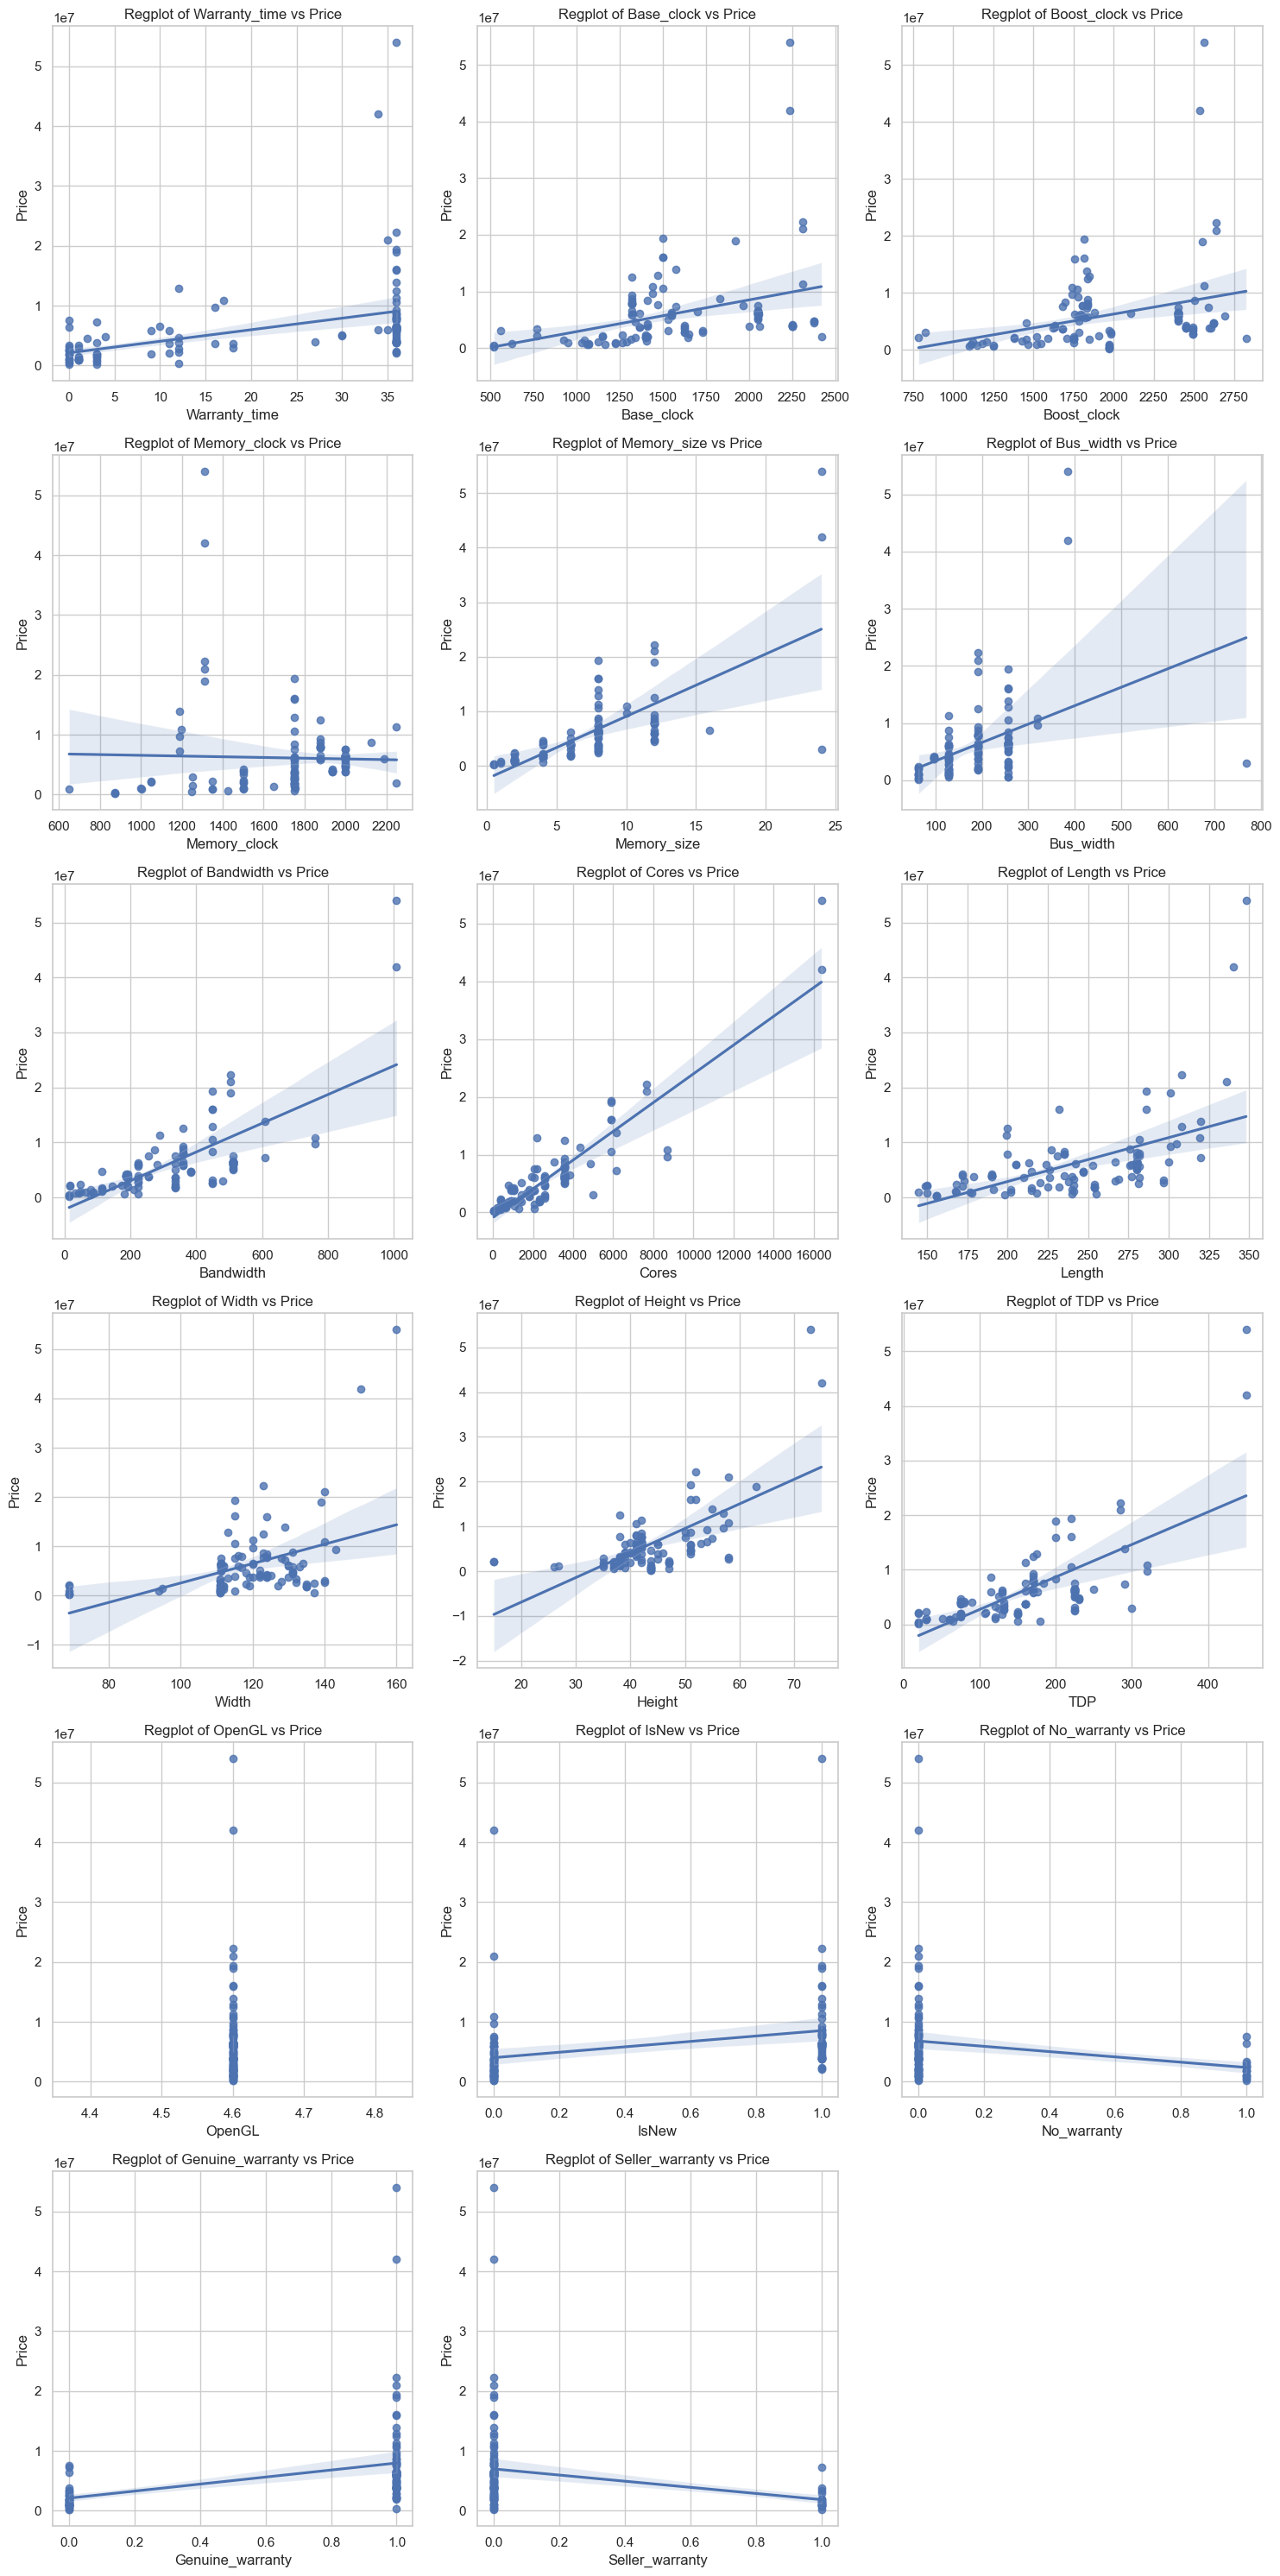

In [ ]:
def regplot_with_price(df):
    # Set the style of the plots
    sns.set(style='whitegrid')

    # Create subplots to display multiple regplots
    num_features = len(features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, feature in enumerate(features):
        ax = axes[i // num_cols, i % num_cols]

        # Create a regplot for each feature
        sns.regplot(x=feature, y='Price', data=df, ax=ax)
        ax.set_title(f'Regplot of {feature} vs Price')

    # Remove empty subplots if necessary
    if num_features < num_rows * num_cols:
        for i in range(num_features, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

regplot_with_price(df)


Danh sách các biến số ảnh hưởng đến giá VGA:
- Memory_size
- Cores
- Bandwidth
- TDP
- Length

In [ ]:
categorical_features = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col]) and col != 'Name']
categorical_features

['Manufacturer',
 'Brand',
 'Architecture',
 'Max_resolution',
 'Memory_type',
 'Bus_interface',
 'DirectX']

In [ ]:
from scipy.stats import f_oneway

def categorical_price_correlation(df, categorical_features, target_column='Price'):
    anova_results = {}

    for feature in categorical_features:
        if pd.api.types.is_numeric_dtype(df[feature]):
            raise ValueError(f"The specified column '{feature}' is not categorical.")

        levels = len(df[feature].unique())
        if levels < 2:
            raise ValueError(f"The specified categorical feature '{feature}' must have at least two levels.")

        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*[df[df[feature] == unique][target_column] for unique in df[feature].unique()])
        anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}
    
    return anova_results



anova_results = categorical_price_correlation(df, categorical_features)

categorical_correlation_df = pd.DataFrame(columns=["feature-name", "p_value", "correlation"])


for feature, results in anova_results.items():
    if results['p-value'] < 0.05:
        feature_result = pd.DataFrame({"feature-name": [feature], "p_value": [results['p-value']], "correlation": "correlation"})
        categorical_correlation_df = pd.concat([categorical_correlation_df, feature_result], ignore_index=True)
    else:
        feature_result = pd.DataFrame({"feature-name": [feature], "p_value": [results['p-value']], "correlation": "no correlation"})
        categorical_correlation_df = pd.concat([categorical_correlation_df, feature_result], ignore_index=True)

categorical_correlation_df

C:\Users\lthan\AppData\Local\Temp\ipykernel_8968\4161924752.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  categorical_correlation_df = pd.concat([categorical_correlation_df, feature_result], ignore_index=True)


,feature-name,p_value,correlation
0,Manufacturer,1.396238e-02,correlation
1,Brand,5.724052e-02,no correlation
2,Architecture,1.015748e-15,correlation
3,Max_resolution,4.745380e-03,correlation
4,Memory_type,3.945918e-16,correlation
5,Bus_interface,1.369666e-04,correlation
6,DirectX,4.995360e-07,correlation


C:\Users\lthan\AppData\Local\Temp\ipykernel_8968\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\lthan\AppData\Local\Temp\ipykernel_8968\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\lthan\AppData\Local\Temp\ipykernel_8968\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\lthan\AppData\Local\Temp\ipykernel_8968\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

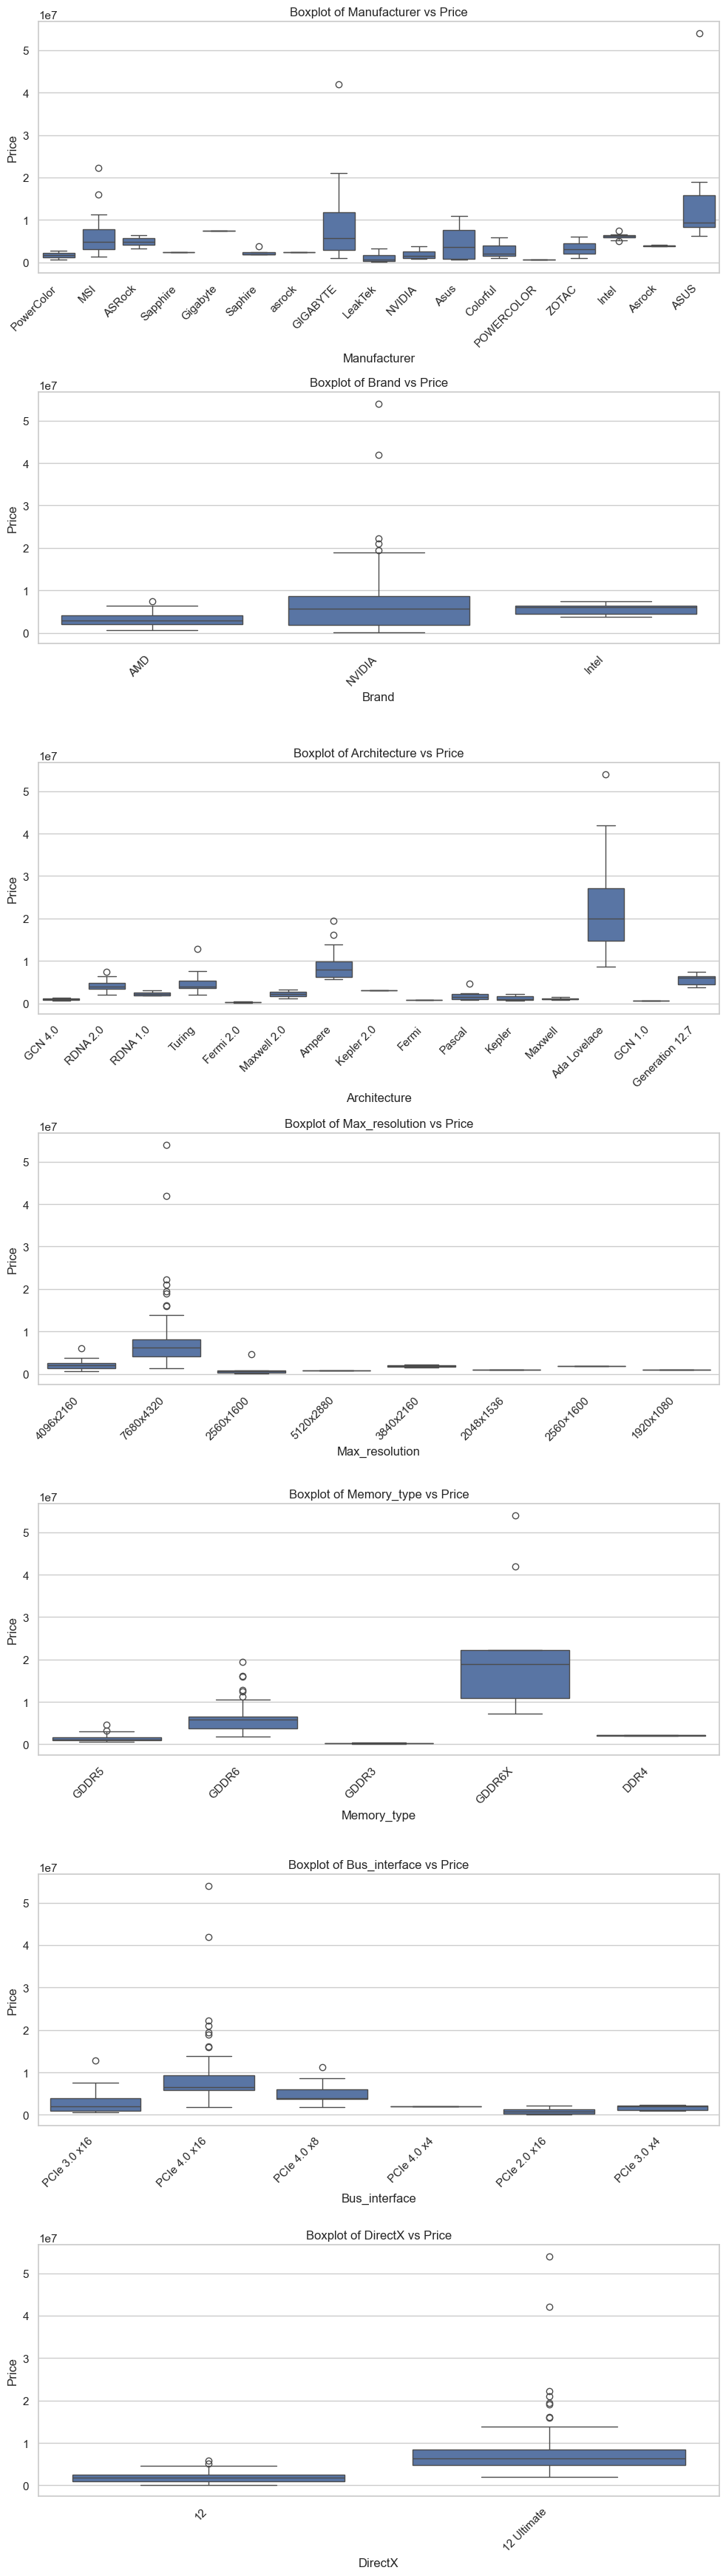

In [ ]:
def plot_categorical_correlation(df, categorical_features, target_column='Price'):
    fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 5 * len(categorical_features)))

    for i, feature in enumerate(categorical_features):
        ax = axes[i]
        sns.boxplot(x=feature, y='Price', data=df, ax=ax)
        ax.set_title(f'Boxplot of {feature} vs Price')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_categorical_correlation(df, categorical_features)

Ngoại trừ Brand với độ chênh lệch giữa các khoảng giá trị nhỏ thì các biến phân loại sau đều ảnh hưởng đến giá VGA:
- Manufacturer
- Architecture
- Max_resolution
- Memory_type
- Bus_interface
- DirectX